# **[Loan Approval Prediction]("https://www.kaggle.com/competitions/playground-series-s4e10") 貸款核准預測**

1. **id** is applicant id
2. **person_age** is age             
3. **person_income** is income              
4. **person_home_ownership** is status of home ownership       
5. **person_emp_length** is employment length (in years)           
6. **loan_intent** is loan intent
7. **loan_grade** is loan grade
8. **loan_amnt** is loan amount
9. **loan_int_rate** is interest rate 
10. **loan_percent_income** is percent income
11. **cb_person_default_on_file** is historical default
12. **cb_person_cred_hist_length** is credit history length
13. **loan_status** is loan status (0 is non; 1 is yes)


In [1]:
import numpy as np 
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import HTML
import plotly.io as pio
from plotly.subplots import make_subplots

## Testing Data

In [2]:
test_df = pd.read_csv("/home/mushroom/kaggle/loan-approval-prediction/data/test.csv")
test_df

id  person_age  person_income person_home_ownership  \
0      58645          23          69000                  RENT   
1      58646          26          96000              MORTGAGE   
2      58647          26          30000                  RENT   
3      58648          33          50000                  RENT   
4      58649          26         102000              MORTGAGE   
...      ...         ...            ...                   ...   
39093  97738          22          31200              MORTGAGE   
39094  97739          22          48000              MORTGAGE   
39095  97740          51          60000              MORTGAGE   
39096  97741          22          36000              MORTGAGE   
39097  97742          31          45000                  RENT   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
0                    3.0    HOMEIMPROVEMENT          F      25000   
1                    6.0           PERSONAL          C      10000   
2                    5.0            VENTURE          E       4000   
3                    4.0  DEBTCONSOLIDATION          A       7000   
4                    8.0    HOMEIMPROVEMENT          D      15000   
...                  ...                ...        ...        ...   
39093                2.0  DEBTCONSOLIDATION          B       3000   
39094                6.0          EDUCATION          A       7000   
39095                0.0           PERSONAL          A      15000   
39096                4.0           PERSONAL          D      14000   
39097                6.0  DEBTCONSOLIDATION          B      19450   

       loan_int_rate  loan_percent_income cb_person_default_on_file  \
0              15.76                 0.36                         N   
1              12.68                 0.10                         Y   
2              17.19                 0.13                         Y   
3               8.90                 0.14                         N   
4              16.32                 0.15                         Y   
...              ...                  ...                       ...   
39093          10.37                 0.10                         N   
39094           6.03                 0.15                         N   
39095           7.51                 0.25                         N   
39096          15.62                 0.39                         Y   
39097           9.91                 0.44                         N   

       cb_person_cred_hist_length  
0                               2  
1                               4  
2                               2  
3                               7  
4                               4  
...                           ...  
39093                           4  
39094                           3  
39095                          25  
39096                           4  
39097                           9  

[39098 rows x 12 columns]

In [3]:
test_df.shape

(39098, 12)

## Training Data

In [4]:
train_df = pd.read_csv("/home/mushroom/kaggle/loan-approval-prediction/data/train.csv")
train_df

id  person_age  person_income person_home_ownership  \
0          0          37          35000                  RENT   
1          1          22          56000                   OWN   
2          2          29          28800                   OWN   
3          3          30          70000                  RENT   
4          4          22          60000                  RENT   
...      ...         ...            ...                   ...   
58640  58640          34         120000              MORTGAGE   
58641  58641          28          28800                  RENT   
58642  58642          23          44000                  RENT   
58643  58643          22          30000                  RENT   
58644  58644          31          75000              MORTGAGE   

       person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  \
0                    0.0   EDUCATION          B       6000          11.49   
1                    6.0     MEDICAL          C       4000          13.35   
2                    8.0    PERSONAL          A       6000           8.90   
3                   14.0     VENTURE          B      12000          11.11   
4                    2.0     MEDICAL          A       6000           6.92   
...                  ...         ...        ...        ...            ...   
58640                5.0   EDUCATION          D      25000          15.95   
58641                0.0     MEDICAL          C      10000          12.73   
58642                7.0   EDUCATION          D       6800          16.00   
58643                2.0   EDUCATION          A       5000           8.90   
58644                2.0     VENTURE          B      15000          11.11   

       loan_percent_income cb_person_default_on_file  \
0                     0.17                         N   
1                     0.07                         N   
2                     0.21                         N   
3                     0.17                         N   
4                     0.10                         N   
...                    ...                       ...   
58640                 0.21                         Y   
58641                 0.35                         N   
58642                 0.15                         N   
58643                 0.17                         N   
58644                 0.20                         N   

       cb_person_cred_hist_length  loan_status  
0                              14            0  
1                               2            0  
2                              10            0  
3                               5            0  
4                               3            0  
...                           ...          ...  
58640                          10            0  
58641                           8            1  
58642                           2            1  
58643                           3            0  
58644                           5            0  

[58645 rows x 13 columns]

In [5]:
train_df.shape

(58645, 13)

In [6]:
train_df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [8]:
train_df["loan_status"] = train_df["loan_status"].astype("category")

In [9]:
pd.set_option('display.max_columns', None)
display(HTML('<style>div.dataframe {max-height: 300px; overflow: auto;}</style>'))

train_df.drop("id",axis = 1).groupby("loan_status", observed=True).describe() # 0 is row, 1 is column

person_age                                                      \
                 count       mean       std   min   25%   50%   75%    max   
loan_status                                                                  
0              50295.0  27.553634  5.980022  20.0  23.0  26.0  30.0  123.0   
1               8350.0  27.534132  6.344539  20.0  23.0  26.0  30.0   80.0   

            person_income                                               \
                    count          mean           std     min      25%   
loan_status                                                              
0                 50295.0  66672.867720  39314.378848  4200.0  45000.0   
1                  8350.0  48224.661796  22435.665380  9600.0  32000.0   

                                         person_emp_length            \
                 50%      75%        max             count      mean   
loan_status                                                            
0            60000.0  80000.0  1900000.0           50295.0  4.863048   
1            44000.0  59000.0   397800.0            8350.0  3.725030   

                                                 loan_amnt                \
                  std  min  25%  50%  75%    max     count          mean   
loan_status                                                                
0            3.948375  0.0  2.0  4.0  7.0  123.0   50295.0   8888.883229   
1            3.887733  0.0  1.0  3.0  6.0  123.0    8350.0  11197.271856   

                                                                     \
                     std     min     25%      50%      75%      max   
loan_status                                                           
0            5328.359771   500.0  5000.0   8000.0  12000.0  35000.0   
1            6468.214784  1000.0  6000.0  10000.0  15000.0  35000.0   

            loan_int_rate                                                    \
                    count       mean       std   min      25%    50%    75%   
loan_status                                                                   
0                 50295.0  10.258767  2.827052  5.42   7.5100  10.39  12.42   
1                  8350.0  13.202305  3.018438  5.42  11.1125  13.79  15.58   

                   loan_percent_income                                        \
               max               count      mean       std   min   25%   50%   
loan_status                                                                    
0            22.11             50295.0  0.145105  0.077867  0.00  0.08  0.13   
1            23.22              8350.0  0.244363  0.118654  0.01  0.14  0.25   

                        cb_person_cred_hist_length                           \
              75%   max                      count      mean       std  min   
loan_status                                                                   
0            0.20  0.63                    50295.0  5.818531  4.001945  2.0   
1            0.33  0.83                     8350.0  5.783593  4.189715  2.0   

                                  
             25%  50%  75%   max  
loan_status                       
0            3.0  4.0  8.0  30.0  
1            3.0  4.0  8.0  30.0

In [10]:
a = pd.crosstab(train_df["loan_status"], train_df["loan_intent"])
b = pd.crosstab(train_df["loan_status"], train_df["person_home_ownership"])
c = pd.crosstab(train_df["loan_status"], train_df["loan_grade"])

pd.concat([a,b,c],axis=1)

DEBTCONSOLIDATION  EDUCATION  HOMEIMPROVEMENT  MEDICAL  PERSONAL  \
loan_status                                                                     
0                         7404      10949             5189     8985      8686   
1                         1729       1322             1091     1949      1330   

             VENTURE  MORTGAGE  OTHER   OWN   RENT      A      B     C     D  \
loan_status                                                                    
0               9082     23341     74  3095  23785  19952  18313  9542  2046   
1                929      1483     15    43   6809   1032   2087  1494  2988   

               E   F   G  
loan_status               
0            378  58   6  
1            631  91  27

In [11]:
px.histogram(train_df, x="loan_status", color="loan_status", template="simple_white",
             labels={
                     "loan_status": "Loan Status",
                     "count": "Count"
                 })\
.update_layout(
    font_family = "Times New Roman",
    font_color = "black",
    legend_title_font_color = "green"
)\
.for_each_trace(lambda trace: trace.update(name=trace.name.replace("0", "No").replace("1", "Yes")))\
.update_xaxes(type='category')\
.update_xaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)\
.update_yaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)\
.update_xaxes(categoryorder = "total descending")\
.show()

In [12]:
px.histogram(train_df, x="loan_intent", color="loan_status", template="simple_white",
             labels={
                     "loan_intent": "Loan Intent",
                     "count": "Count"
                 })\
.update_layout(
    font_family = "Times New Roman",
    font_color = "black",
    legend_title_font_color = "green"
)\
.for_each_trace(lambda trace: trace.update(name=trace.name.replace("0", "No").replace("1", "Yes")))\
.update_xaxes(type='category')\
.update_xaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)\
.update_yaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)\
.update_xaxes(categoryorder = "total descending")\
.show()

In [13]:
px.histogram(train_df, x="person_home_ownership", color="loan_status", template="simple_white",
             labels={
                     "person_home_ownership": "Home Ownership",
                     "count": "Count"
                 })\
.update_layout(
    font_family = "Times New Roman",
    font_color = "black",
    legend_title_font_color = "green"
)\
.for_each_trace(lambda trace: trace.update(name=trace.name.replace("0", "No").replace("1", "Yes")))\
.update_xaxes(type='category')\
.update_xaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)\
.update_yaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)\
.update_xaxes(categoryorder = "total descending")\
.show()

In [14]:
px.histogram(train_df, x="loan_grade", color="loan_status", template="simple_white",
             labels={
                     "loan_grade": "Loan Grade",
                     "count": "Count",
                     "loan_status": "Loan Status"
                 })\
.update_layout(
    font_family = "Times New Roman",
    font_color = "black",
    legend_title_font_color = "green"
)\
.for_each_trace(lambda trace: trace.update(name=trace.name.replace("0", "No").replace("1", "Yes")))\
.update_xaxes(type='category')\
.update_xaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)\
.update_yaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)\
.update_xaxes(categoryorder = "total descending")\
.show()

<Axes: xlabel='loan_status', ylabel='cb_person_cred_hist_length'>

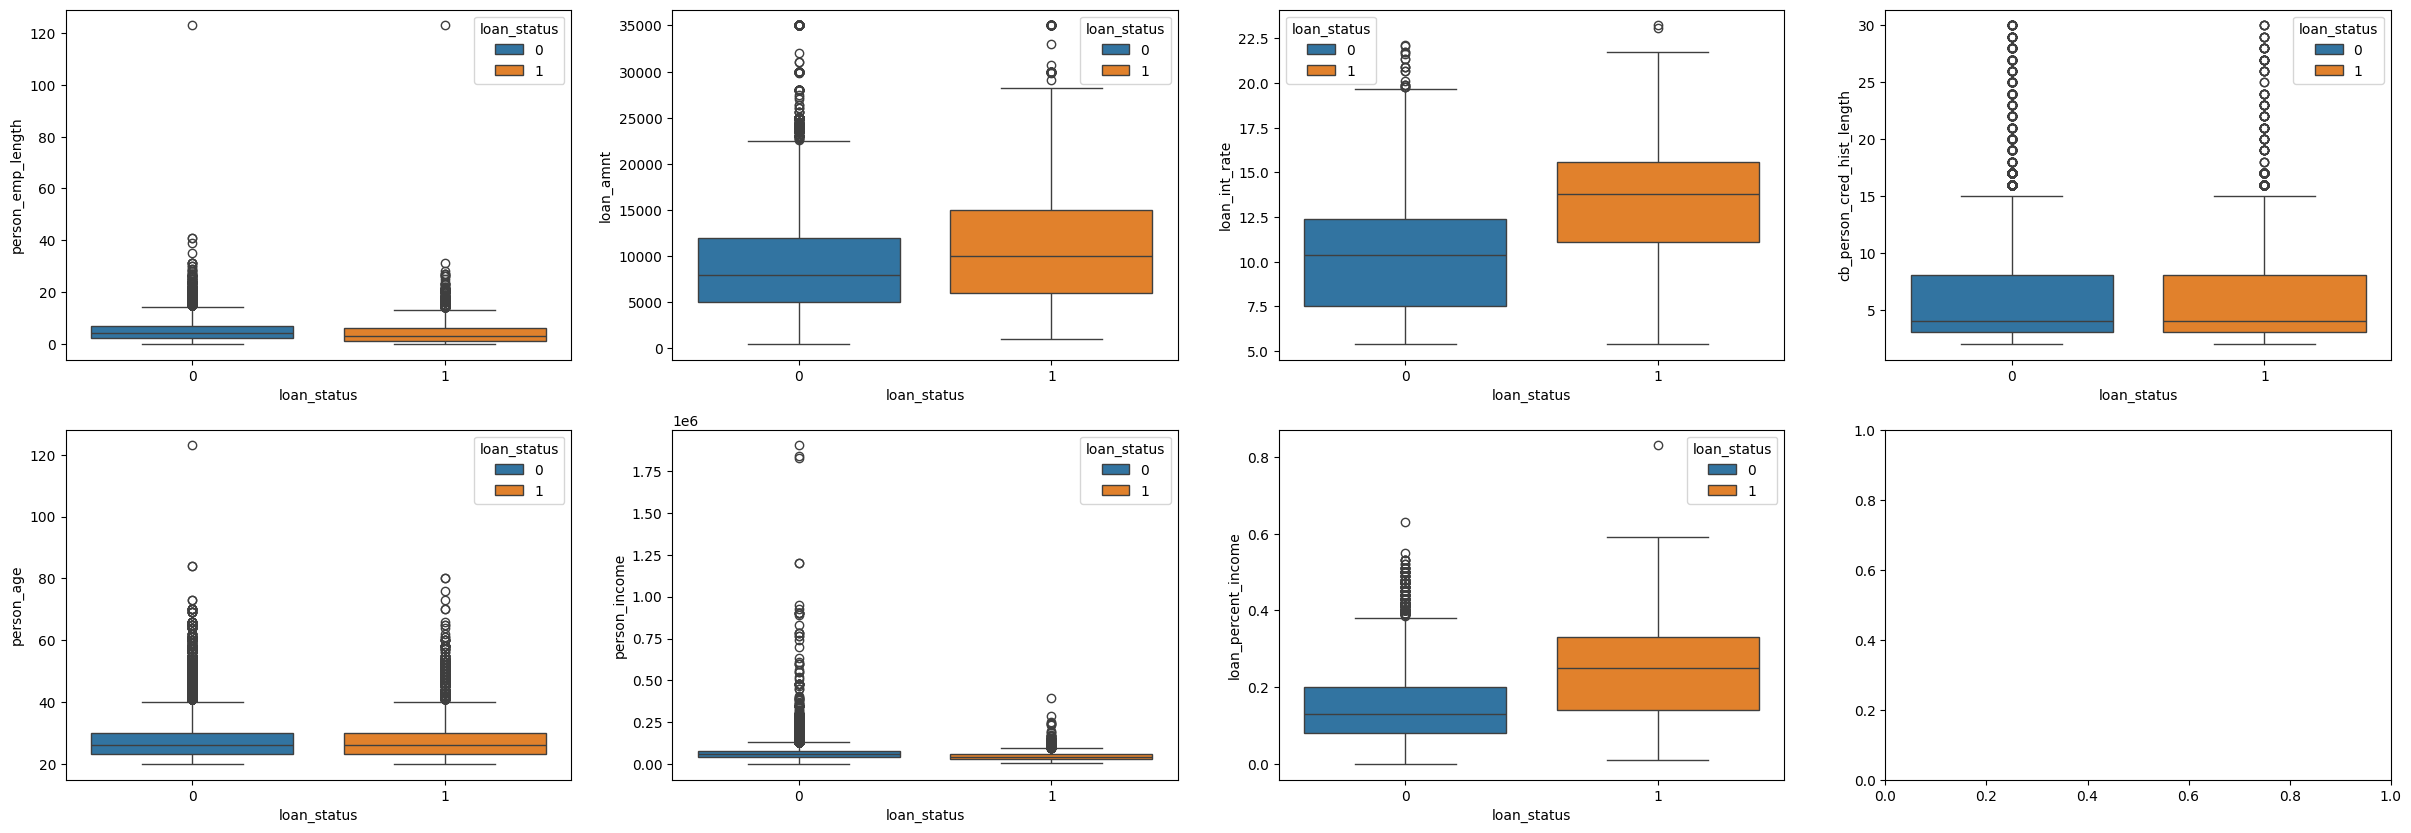

In [15]:
f, axes = plt.subplots(2, 4, figsize=(30, 10))
sns.boxplot(x = "loan_status", y = "person_emp_length", hue="loan_status", data = train_df, ax = axes[0][0])
sns.boxplot(x = "loan_status", y = "person_age", hue="loan_status", data = train_df, ax = axes[1][0])
sns.boxplot(x = "loan_status", y = "loan_amnt", hue="loan_status", data = train_df, ax = axes[0][1])
sns.boxplot(x = "loan_status", y = "person_income", hue="loan_status", data = train_df, ax = axes[1][1])
sns.boxplot(x = "loan_status", y = "loan_int_rate", hue="loan_status", data = train_df, ax = axes[0][2])
sns.boxplot(x = "loan_status", y = "loan_percent_income", hue="loan_status", data = train_df, ax = axes[1][2])
sns.boxplot(x = "loan_status", y = "cb_person_cred_hist_length", hue="loan_status", data = train_df, ax = axes[0][3])


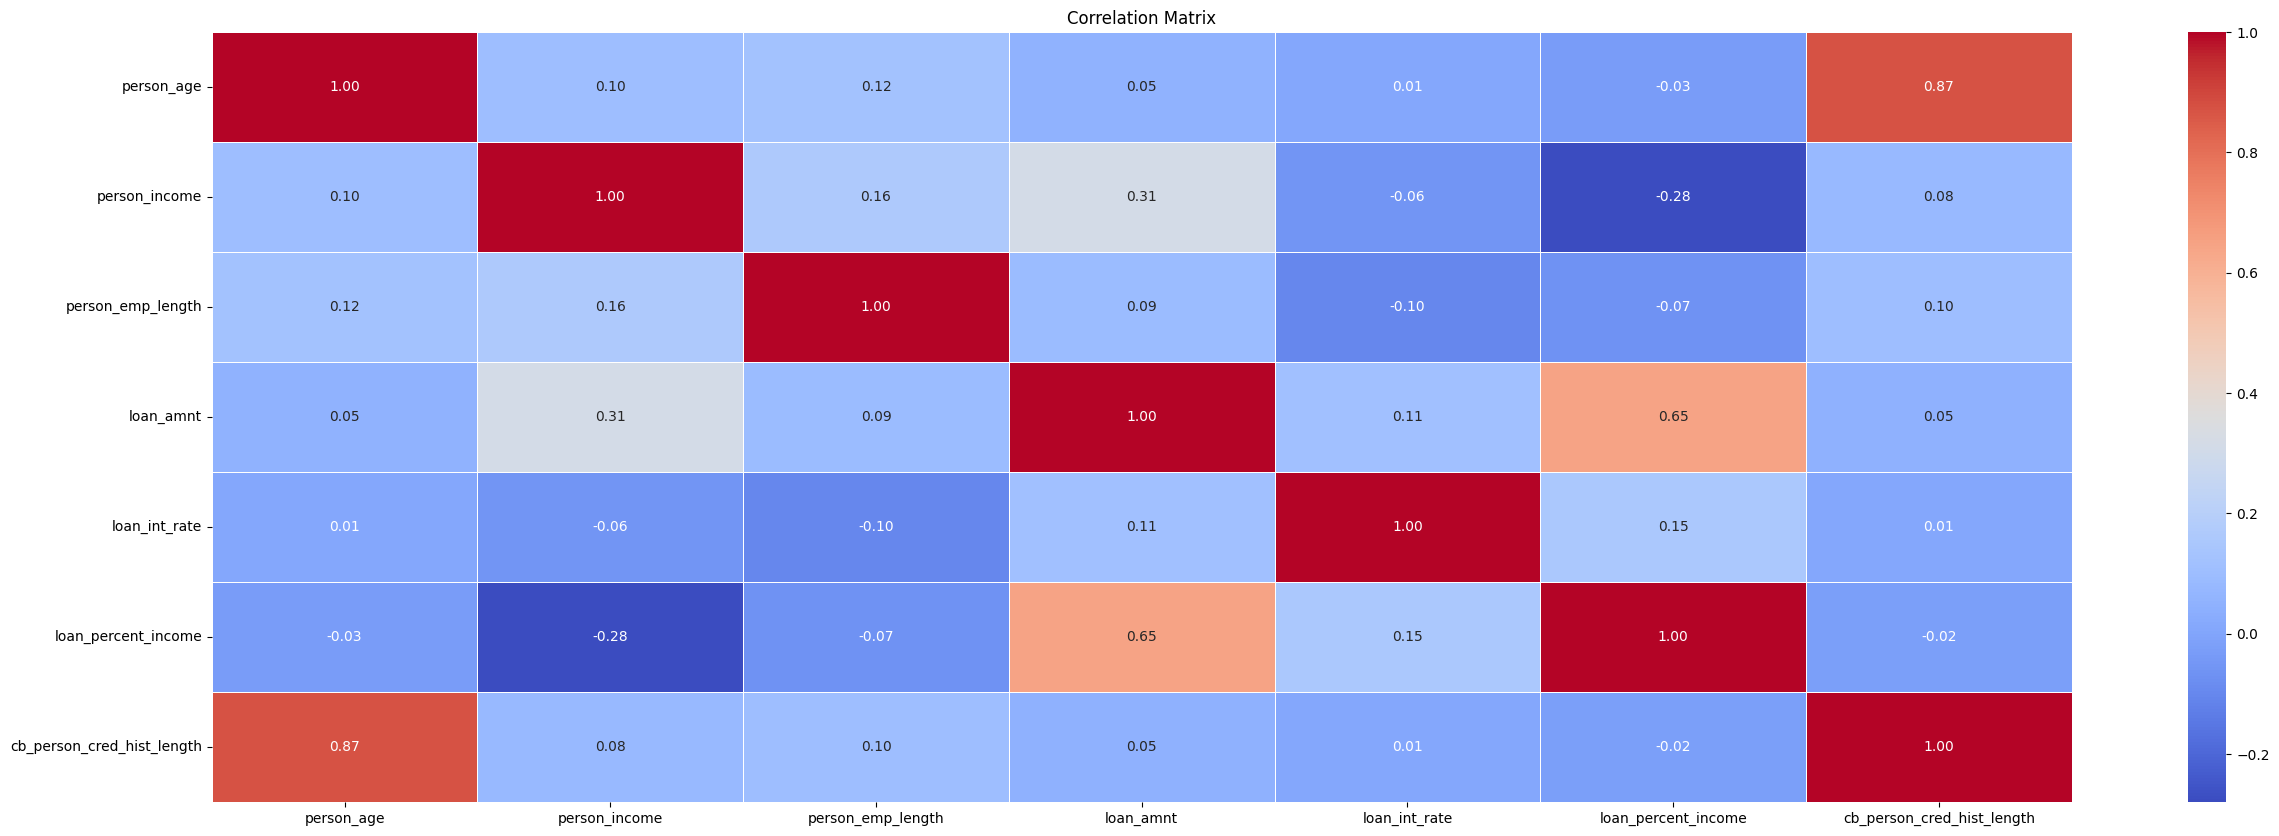

In [16]:
plt.figure(figsize=(30, 10))
corr_matrix = train_df.drop(['id','person_home_ownership','loan_intent', 'loan_grade','cb_person_default_on_file','loan_status'],axis = 1).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

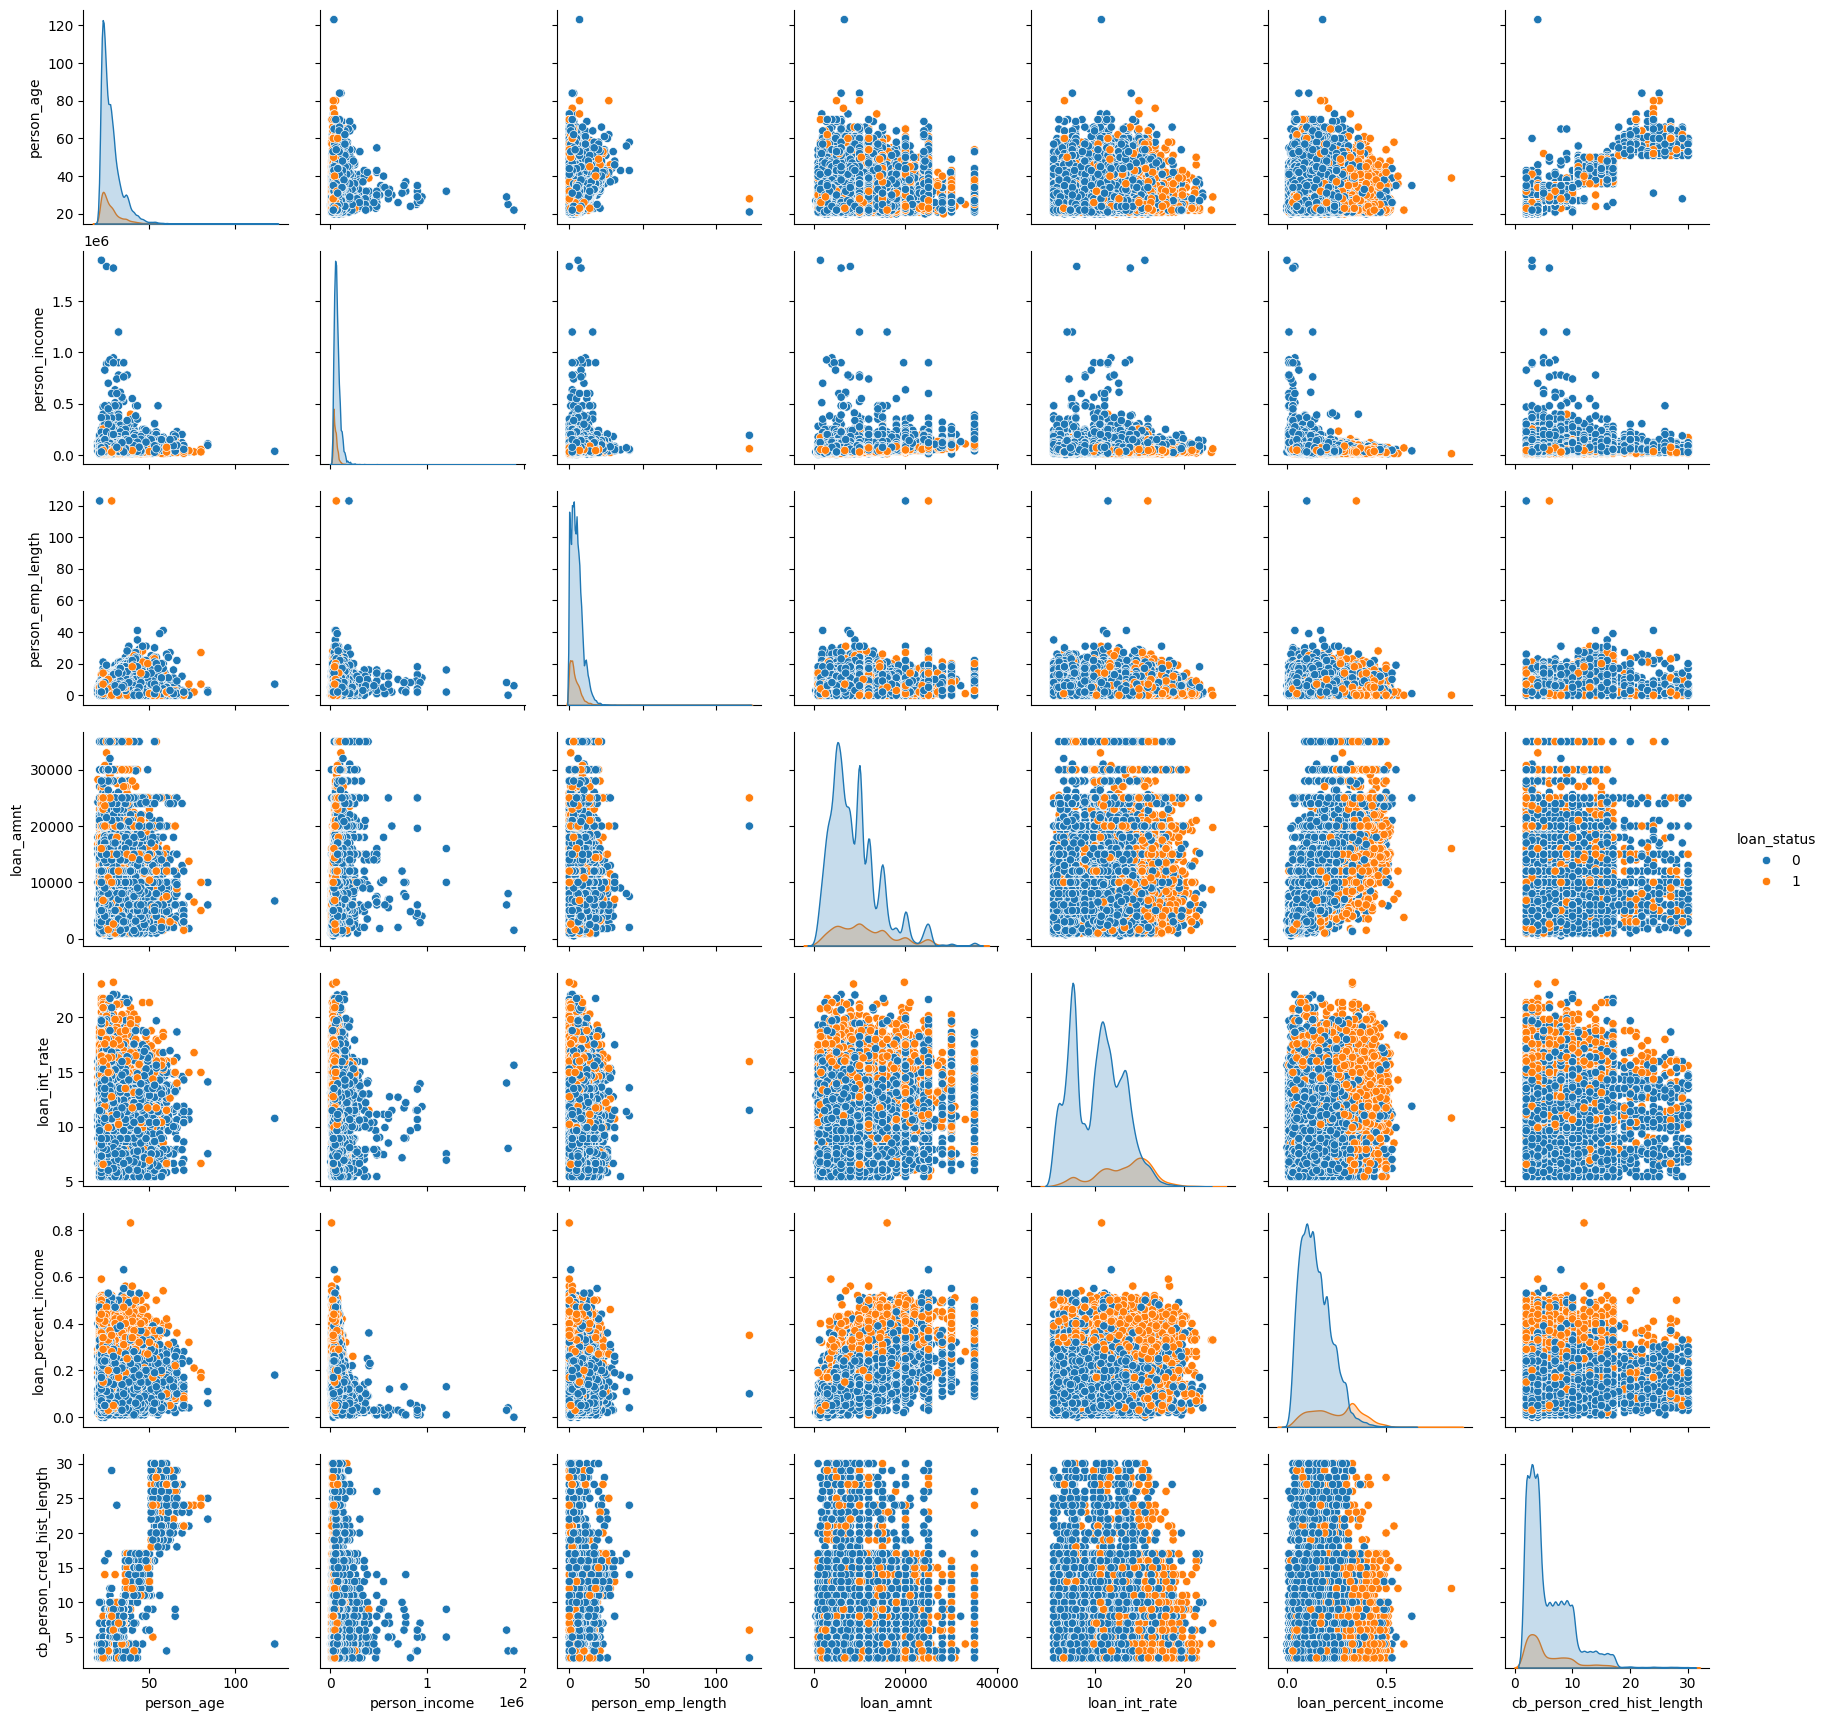

In [17]:
sns.pairplot(train_df.drop(['id','person_home_ownership','loan_intent', 'loan_grade','cb_person_default_on_file'],axis = 1), hue="loan_status")